In [1]:
import pandas as pd
%pylab inline
import numpy as np

from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

Populating the interactive namespace from numpy and matplotlib


# Objective

To predict how many people will survive the tragedy.

# Data Preparation

In [2]:
data=pd.read_csv("titanic (1).csv")
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S
1,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S
4,1,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S
5,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,0.0000,S
6,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,51.4792,S
7,1,0,"Astor, Col. John Jacob",male,47.0,1,0,227.5250,C
8,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.5250,C
9,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 9 columns):
pclass      1257 non-null int64
survived    1257 non-null int64
name        1257 non-null object
sex         1257 non-null object
age         996 non-null float64
sibsp       1257 non-null int64
parch       1257 non-null int64
fare        1257 non-null float64
embarked    1257 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 88.5+ KB


Here, we note that :

$Total number of entries : 1257

$"age" column has 261 (=1257-996) missing elements, which have to be filled else our predictions will be drastically different from the  real outcome.   

In [4]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

Looking through the column headings, we notice that "name" doesn't seem to be a factor that contributes in the survival of a person. Hence, we should drop it from the data.

In [5]:
data=data.drop("name",1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0,0,0,211.3375,S
1,1,0,female,2.0,1,2,151.5500,S
2,1,0,male,30.0,1,2,151.5500,S
3,1,0,female,25.0,1,2,151.5500,S
4,1,1,male,48.0,0,0,26.5500,S


In [6]:
data[data.age.isna()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
11,1,0,male,NaN,0,0,25.9250,S
33,1,1,male,NaN,0,0,26.5500,S
36,1,0,male,NaN,0,0,39.6000,C
42,1,0,male,NaN,0,0,31.0000,S
55,1,1,female,NaN,0,0,27.7208,C
64,1,1,female,NaN,0,1,55.0000,S
65,1,0,male,NaN,0,0,0.0000,S
69,1,0,male,NaN,0,0,52.0000,S
74,1,0,male,NaN,0,0,26.5500,S
98,1,0,male,NaN,0,0,221.7792,S


In [7]:
data.age.mean()

29.07078313253012

Filling the missing values with the mean of age would be a likely method to adopt. So we do the same. 

In [8]:
data.age=data.age.fillna(data.age.mean())
data.age

0       29.000000
1        2.000000
2       30.000000
3       25.000000
4       48.000000
5       39.000000
6       53.000000
7       47.000000
8       18.000000
9       24.000000
10      26.000000
11      29.070783
12      24.000000
13      50.000000
14      32.000000
15      36.000000
16      37.000000
17      47.000000
18      26.000000
19      42.000000
20      29.000000
21      25.000000
22      25.000000
23      19.000000
24      35.000000
25      28.000000
26      45.000000
27      40.000000
28      30.000000
29      58.000000
          ...    
1227    18.000000
1228    31.000000
1229    16.000000
1230    31.000000
1231    22.000000
1232    20.000000
1233    14.000000
1234    22.000000
1235    22.000000
1236    29.070783
1237    29.070783
1238    29.070783
1239    32.500000
1240    38.000000
1241    51.000000
1242    18.000000
1243    21.000000
1244    47.000000
1245    29.070783
1246    29.070783
1247    29.070783
1248    28.500000
1249    21.000000
1250    27.000000
1251    29

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 8 columns):
pclass      1257 non-null int64
survived    1257 non-null int64
sex         1257 non-null object
age         1257 non-null float64
sibsp       1257 non-null int64
parch       1257 non-null int64
fare        1257 non-null float64
embarked    1257 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 78.6+ KB


We see that the missing values have been filled.

In [10]:
data.describe()

,pclass,survived,age,sibsp,parch,fare
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,2.310263,0.382657,29.070783,0.501989,0.377884,32.720896
std,0.831791,0.486229,11.410279,1.056616,0.863035,51.127788
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.070783,0.000000,0.000000,14.400000
75%,3.000000,1.000000,34.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,60.000000,8.000000,9.000000,512.329200


On a broader view, we can conclude the following :

$ pclass : Majority of the passengers belonged to the 3rd class.

$ survived : On an average, 38% of the passengers survived.

$ age : Average age of passengers : 29 years, 
        Minimum age : 1 year, 
        Maxmimum age : 60 years

# Data Cleansing

The major part involved here would be to check for outliers. A simple and effective way to find the outliers is to use boxplots.

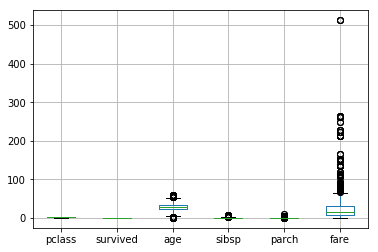

In [11]:
data.boxplot()

We note outliers in - age, sibsp, parch and fare.

Hence, we look into each one by one.

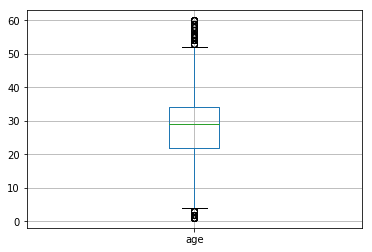

In [12]:
data[["age"]].boxplot()

In [13]:
data[data.age>50].age.value_counts()

54.0    10
51.0     8
55.0     8
60.0     7
52.0     6
58.0     6
57.0     5
56.0     4
53.0     4
59.0     3
55.5     1
Name: age, dtype: int64

In [14]:
data[data.age>50].age.mean()

55.185483870967744

Even though we see that the mean age 55 years, it would not be sensible to cap at 55 since many outliers will still be left behind. Since the upper limit for "age" is 52 years, we cape the age values above 52 at 52.

In [15]:
data[data.age<5].age.value_counts()

2.0    12
1.0    10
4.0    10
3.0     7
Name: age, dtype: int64

Even though the lower limit is 2 years, we cape the age values below 4 at 4 years else many outliers would be left behind. 

In [16]:
data.loc[data.age>52, "age"] = 52
data.loc[data.age<4, "age"] = 4

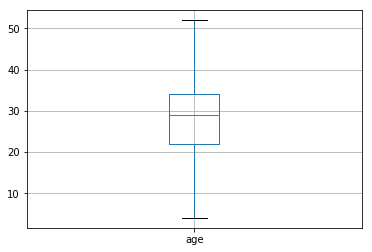

In [17]:
data[["age"]].boxplot()

We observe that the outliers have been removed.

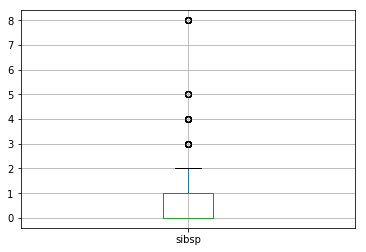

In [18]:
data[["sibsp"]].boxplot()

Even though there are 4 outliers, these definitely seem to influence the chance of the corresponding peron of his/her survival. So  we do not intend to remove these.

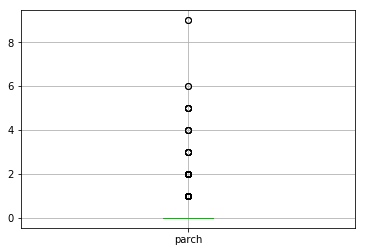

In [19]:
data[["parch"]].boxplot()

Here too, we cannot ignore these outlieres since the play an influential role in determining the probability of the persons' survival. 

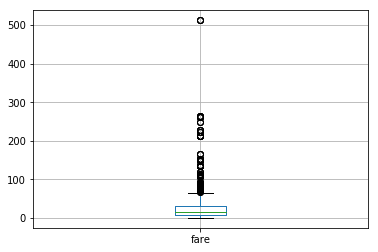

In [20]:
data[["fare"]].boxplot()

Here, we note that there are huge number of outliers and removing them all doesn't make sense. So we check the quantiles and seek where to loc the age values.

In [21]:
data.fare.quantile([.95,.96,.97,.98,.99])

0.95    120.000000
0.96    136.504184
0.97    157.111844
0.98    211.500000
0.99    262.375000
Name: fare, dtype: float64

In [22]:
data.loc[data.fare>136, "age"] = 136

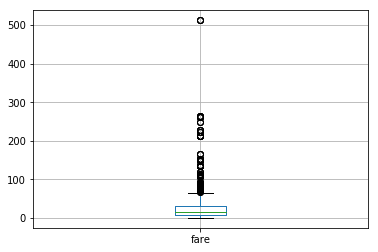

In [23]:
data[["fare"]].boxplot()

# Data Visualization and Interpretations

In [24]:
import seaborn as sb


We note that, we can use matplotlib or seaborn for data visualization. Since figures made using seaborn seems to be a bit more appealing than the other, we mostly prefer seaborn.

In [25]:
htdata= pd.get_dummies(data,drop_first= True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247F637E4E0>,
      dtype=object)

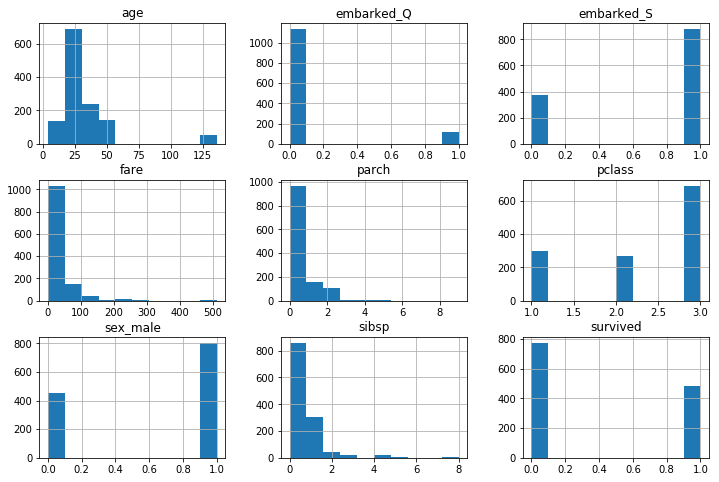

In [26]:
htdata.hist(figsize=(12,8))

$ We see that "pclass" , "survived" ,"embarke_Q", "embarked_S", "sex_male" and "survived"are categorical variables.

C:\Users\Krishna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


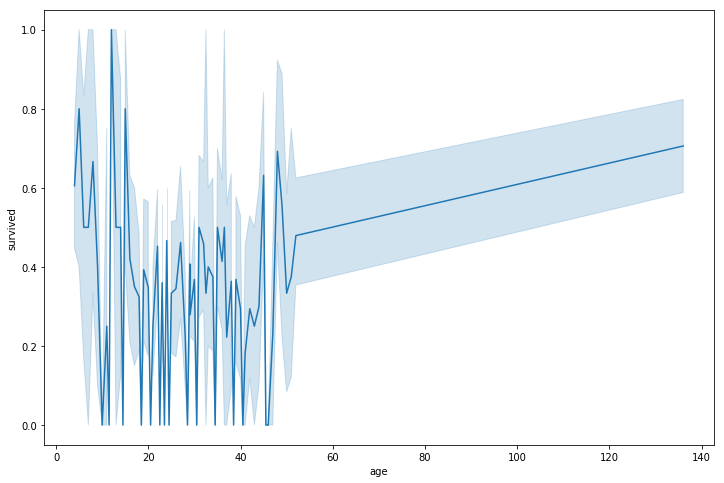

In [27]:
plt.figure(figsize=(12,8))
sb.lineplot(htdata.age,htdata.survived)

* Passengers in the age group 1 - 16 have high probablity of survival.

* Passengers belonging to the age group 17 - 47 have low probability of survival.

* Passengers belonging to the remaining age group have a moderate probability of survival.

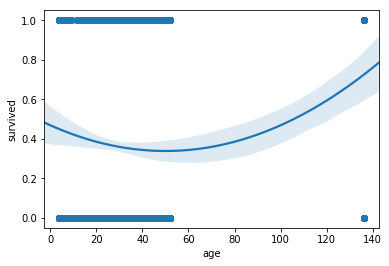

In [28]:
sb.regplot(htdata.age, htdata.survived, order = 2)

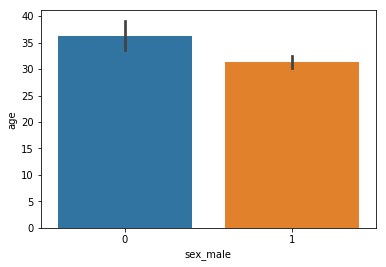

In [29]:
sb.barplot(htdata.sex_male, htdata.age)

$ Females were more in proportion to the males.

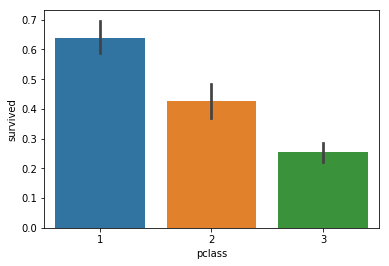

In [30]:
sb.barplot(htdata.pclass,htdata.survived)

* It's clear that majority of the 1st class passengers survived and majority of the 3rd class passengers didn't.

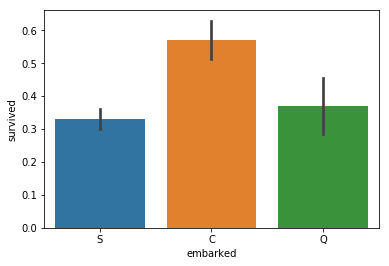

In [31]:
sb.barplot(data.embarked ,data.survived)

$ Passengers who boarded from port C have more of survival.

In [32]:
pd.crosstab(htdata.sex_male,htdata.survived,normalize=True)

survived,0,1
sex_male,,
0,0.098648,0.260939
1,0.518695,0.121718


We note that 26% females survived and 52% males didn't survive.

In [33]:
pd.crosstab([htdata.pclass,htdata.sex_male],htdata.survived,normalize=True)

survived                0         1
pclass sex_male                    
1      0         0.003182  0.105807
       1         0.082737  0.046937
2      0         0.009547  0.073986
       1         0.112172  0.016706
3      0         0.085919  0.081146
       1         0.323787  0.058075

We notice that female of pclass 1 are the most fortunate ones to survive (10.6%).

Male of pclass 3 were the most unfortunate ones to survive (32.4% died).

In [34]:
pd.crosstab(htdata.sibsp,htdata.survived)

survived,0,1
sibsp,,
0,559,300
1,146,155
2,23,17
3,14,6
4,19,3
5,6,0
8,9,0


As expected, more the number of siblings/spouses less would be the chances of survival.

In [35]:
pd.crosstab(htdata.parch,htdata.survived)

survived,0,1
parch,,
0,639,329
1,67,93
2,55,52
3,2,5
4,4,1
5,5,1
6,2,0
9,2,0


Likewise, more the number of parents/children less would be the chance of suvival.

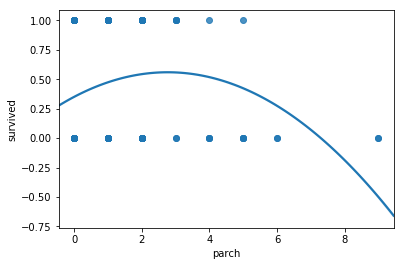

In [36]:
sb.regplot(htdata.parch, htdata.survived, order = 2 , ci = .9)

# Data Modelling and Validation

## 1. Logistic Regression

In [37]:
X=htdata.drop("survived",1)
y=htdata.survived

In [38]:
import statsmodels.api as sta

In [39]:
stlg = sta.Logit(y,sta.add_constant(X)).fit()
stlg.summary()

Optimization terminated successfully.
         Current function value: 0.453464
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1257
Model:                          Logit   Df Residuals:                     1248
Method:                           MLE   Df Model:                            8
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:                  0.3185
Time:                        17:54:43   Log-Likelihood:                -570.00
converged:                       True   LL-Null:                       -836.34
                                        LLR p-value:                6.808e-110
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9211      0.388     10.094      0.000       3.160       4.682
pclass        -0.7196      0.117     -6.129      0.000      -0.950      -0.490
age           -0.0298      0.005     -5.474      0.000      -0.040      -0.019
sibsp         -0.3706      0.094     -3.924      0.000      -0.556      -0.185
parch         -0.1127      0.095     -1.189      0.234      -0.298       0.073
fare           0.0153      0.004      4.357      0.000       0.008       0.022
sex_male      -2.6485      0.166    -15.960      0.000      -2.974      -2.323
embarked_Q    -0.5422      0.308     -1.763      0.078      -1.145       0.061
embarked_S    -0.5926      0.193     -3.064      0.002      -0.972      -0.214
==============================================================================
"""

We see that few of the features like - parch,embarked_Q have p value greater than .05(our threshold) which means that these features don't contribute to our target variable(survived). Hence, we drop them. 

In [40]:
todrop = ["parch","embarked_Q","survived"]

In [41]:
X= htdata.drop(todrop,1)
y=htdata.survived

In [42]:
stlg = sta.Logit(y, sta.add_constant(X)).fit()
stlg.summary()

Optimization terminated successfully.
         Current function value: 0.455130
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1257
Model:                          Logit   Df Residuals:                     1250
Method:                           MLE   Df Model:                            6
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:                  0.3160
Time:                        17:54:44   Log-Likelihood:                -572.10
converged:                       True   LL-Null:                       -836.34
                                        LLR p-value:                6.103e-111
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8144      0.379     10.071      0.000       3.072       4.557
pclass        -0.7850      0.113     -6.973      0.000      -1.006      -0.564
age           -0.0295      0.005     -5.512      0.000      -0.040      -0.019
sibsp         -0.3843      0.093     -4.154      0.000      -0.566      -0.203
fare           0.0148      0.003      4.421      0.000       0.008       0.021
sex_male      -2.5646      0.158    -16.223      0.000      -2.874      -2.255
embarked_S    -0.4274      0.162     -2.632      0.008      -0.746      -0.109
==============================================================================
"""

Now we have the fetures which influence the target variable.

In [43]:
stlg.predict()

array([0.84825066, 0.61126187, 0.10793514, ..., 0.6999312 , 0.08798161,
       0.13533005])

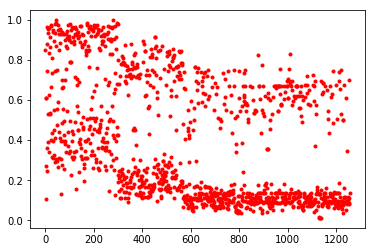

In [44]:
plt.plot(stlg.predict(),"r.")

## Validation

In [45]:
stlg.pred_table(threshold=.6)

array([[702.,  74.],
       [173., 308.]])

Accuracy = (702+308)/(702+74+173+308) = .8035 = 80.35%

Precision = (702/(702+173)) = .8023 = 80.23%

Recall = (702/(702+74)) = .90464 = 90.464%

We note that our Accuracy, Precision and Recall are quite high indicating that our model is fit well.

In [46]:
sklg = linear_model.LogisticRegression().fit(X,y)

C:\Users\Krishna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
sklg.predict(X)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
metrics.roc_auc_score(y,sklg.predict(X))

0.7724510791521102

In [49]:
sklgfpr, sklgtpr, sklgthresholds = metrics.roc_curve(y, sklg.predict_proba(X)[:,1])

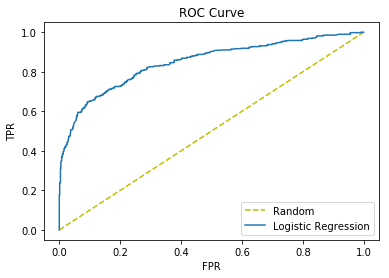

In [50]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(sklgfpr, sklgtpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Logistic Regression"])
plt.title("ROC Curve")
plt.show()

# 2. Decision Tree

In [51]:
data_1 = pd.get_dummies(data,drop_first = True)
data_1

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,136.000000,0,0,211.3375,0,0,1
1,1,0,136.000000,1,2,151.5500,0,0,1
2,1,0,136.000000,1,2,151.5500,1,0,1
3,1,0,136.000000,1,2,151.5500,0,0,1
4,1,1,48.000000,0,0,26.5500,1,0,1
5,1,0,39.000000,0,0,0.0000,1,0,1
6,1,1,52.000000,2,0,51.4792,0,0,1
7,1,0,136.000000,1,0,227.5250,1,0,0
8,1,1,136.000000,1,0,227.5250,0,0,0
9,1,1,24.000000,0,0,69.3000,0,0,0


In [52]:
X = data_1.drop("survived",1)
y = data_1["survived"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(879, 8) (378, 8) (879,) (378,)


In [54]:
dt = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=10,random_state=0)

In [55]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [56]:
dt.predict(X)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
from IPython.display import *
from graphviz import Source

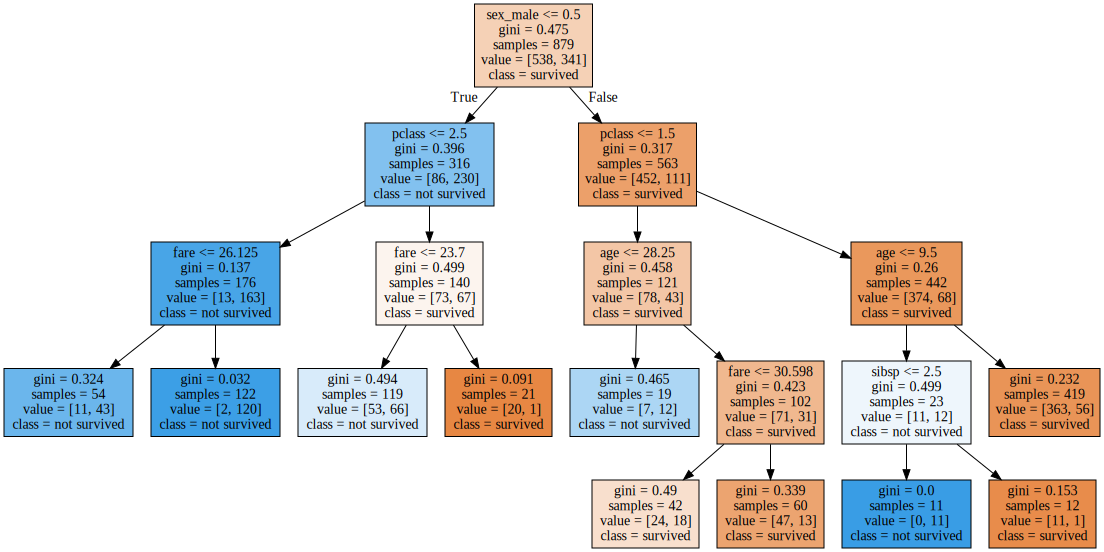

In [58]:
model = dt
cols=X_test.columns
class_list=["survived","not survived"]

graph = Source(tree.export_graphviz(model, out_file=None, feature_names=cols, class_names = class_list, filled = True))

display(SVG(graph.pipe(format='svg')))

# Validation

In [59]:
print("Train accuracy :",dt.score(X_train, y_train),"\nTest acccuracy :", dt.score(X_test, y_test))

Train accuracy : 0.8156996587030717 
Test acccuracy : 0.8121693121693122


We see that the decision tree fits with an accuracy of 81.57 %.

In [60]:
dtfpr, dttpr, dtthresholds = metrics.roc_curve(y_test, dt.predict_proba(X_test)[:,1])

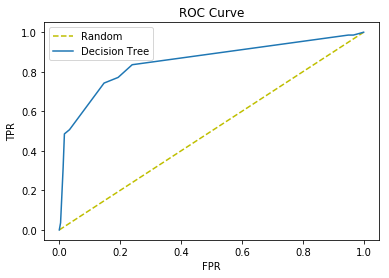

In [61]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(dtfpr, dttpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Decision Tree"])
plt.title("ROC Curve")
plt.show()

We notice that the Decision Tree does explains the characteristic required of the model quite well.

# 3. Random Forest

In [62]:
rf = RandomForestClassifier(n_estimators=200,max_depth=5, random_state=0)

In [63]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
rf.predict(X)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

# Validation

In [65]:
print("Train accuracy :",rf.score(X_train, y_train),"\nTest acccuracy :", rf.score(X_test, y_test))

Train accuracy : 0.8395904436860068 
Test acccuracy : 0.8201058201058201


We notice that random forest does fits the model well with an accuracy of 82 %.

In [66]:
rffpr, rftpr, rfthresholds = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])

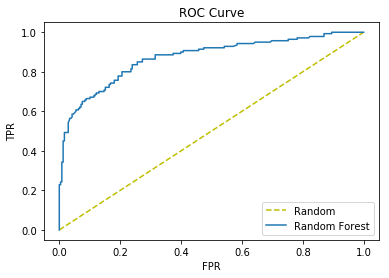

In [67]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(rffpr, rftpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Random Forest"])
plt.title("ROC Curve")
plt.show()

We see that Random Forest does distinguish the survived versus those who didn't quite well.

# 4. K Nearest Neighbors (KNN)

In [68]:
knn= neighbors.KNeighborsClassifier(n_neighbors=3)

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [70]:
knn.predict(X)

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

# Validation

In [71]:
print("Train accuracy :",knn.score(X_train,y_train), "\nTest accuracy :",knn.score(X_test,y_test))

Train accuracy : 0.825938566552901 
Test accuracy : 0.7037037037037037


Note that the accuracy is just 70.37%.

In [72]:
knnfpr, knntpr, knnthresholds = metrics.roc_curve(y_test, knn.predict_proba(X_test)[:,1])

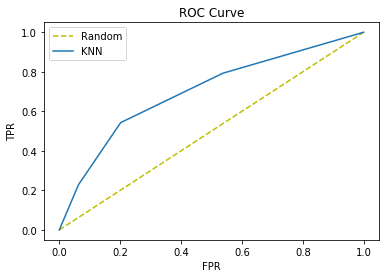

In [73]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(knnfpr, knntpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "KNN"])
plt.title("ROC Curve")
plt.show()

Notice that the area covered under the roc curve is quite less hence pointing out that this doesn't distinguish well between those survived and not.

# 5. Naive Bayes

In [74]:
nb=naive_bayes.GaussianNB()

In [75]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
nb.predict(X)

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

# Validation

In [77]:
print("Train accuracy :",nb.score(X_train,y_train), "\nTest accuracy :",nb.score(X_test,y_test))

Train accuracy : 0.7804323094425484 
Test accuracy : 0.8095238095238095


We note the model fits quite well with an accuracy of 80.9%.

In [78]:
nbfpr, nbtpr, knnthresholds = metrics.roc_curve(y_test, nb.predict_proba(X_test)[:,1])

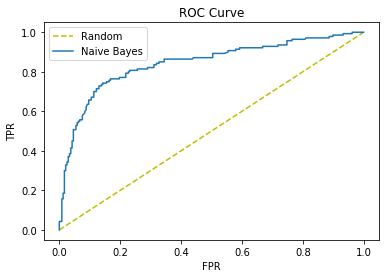

In [79]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(nbfpr,nbtpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Naive Bayes"])
plt.title("ROC Curve")
plt.show()

As expected the model does fits well and is capable of distinguishing the survived from those not in an appealing manner.

# An Easy overall Comparison

## On the basis of ROC Curve

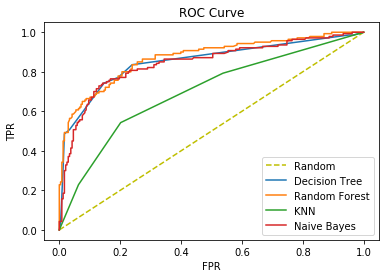

In [80]:
plt.plot(np.arange(0,1.1,.1),np.arange(0,1.1,.1),'y--' )
plt.plot(dtfpr,dttpr)
plt.plot(rffpr,rftpr)
plt.plot(knnfpr,knntpr)
plt.plot(nbfpr,nbtpr)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Random', "Decision Tree", "Random Forest", "KNN", "Naive Bayes"])
plt.title("ROC Curve")
plt.show()

We observe that even though Random Forest, Decision Tree and Naive Bayes almost explains well , on a analyzing we get that Random Forest is the best fit model followed by Decision Tree, Naive Bayes, and then KNN.

Let , 

In [81]:
d ={"Models" : ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "Naive Bayes"], 
    "Accuracy" : ["80.35%", "81.57%", "82.01%", "70.37%", "80.95%"]}

# Conclusion

In [82]:
df = pd.DataFrame(data=d)
df.sort_values("Accuracy",ascending = False)

,Models,Accuracy
2,Random Forest,82.01%
1,Decision Tree,81.57%
4,Naive Bayes,80.95%
0,Logistic Regression,80.35%
3,KNN,70.37%


The best fit model is Random Forest followed by Decision Tree, Naive Bayes, Logistic Regression and KNN.